# Validação cruzada

### Objetivo da apresentação

Identificar maneiras de evitar com que um modelo preditivo deixe de ser genérico o suficiente para previsões ainda não vistas, caso exista uma influência na forma de validação. O dataset e o dicionário de variáveis podem ser baixados pelo link https://www.kaggle.com/hellbuoy/car-price-prediction

## Construindo um modelo do zero

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv', index_col=0)

In [5]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


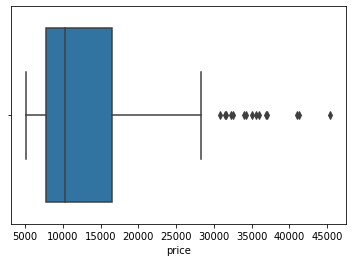

In [8]:
sns.boxplot(df['price'])

C:\ProgramData\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


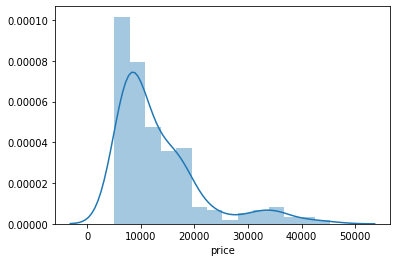

In [9]:
sns.distplot(df['price'])

In [10]:
num_col =[]
for col in df.columns:
    if df[col].dtypes != np.object:
        num_col.append(col)

In [ ]:
sns.pairplot(df[num_col])

In [ ]:
num_col

In [ ]:
X = df[num_col].drop('price',axis=1)
y = df['price']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn import svm
regr = svm.SVR()

In [ ]:
regr.fit(X,y)

## Partiu dar deploy! :D

<img src="img/datasiens.jpg" width=300 height=300 />

### Precisamos SEMPRE separar em treino e teste

### 1. Hold Out

A forma mais usual de se pensar em validar o modelo é pela divisão Treino/Teste

<img src="img/hold_out.png" width=500 height=500 />

### 2. Random sampling

Uma forma mais robusta de tirarmos o viés de divisão treino/teste na ordem que os dados são apresentados é fazer de forma aleatória a divisão. Normalmente se usa um range de Treino 70-80% e Teste 20-30%

<img src="img/random_sample.png" width=500 height=500 />

### 3. K-folds

Calcula-se um erro médio para as k divisões realizadas, a fim de estimar com mais generalidade o quão bem o modelo está performando. Custa muito pouco computacionalmente fazer essa verificação e um modelo que performe bem independente de sua divisão, pode ser considerado um modelo .

<img src="img/kfold.png" width=500 height=500 />

### 4. Bootstrapping

<img src="img/bootstrap.png" width=500 height=500 />

## Aplicação prática: Random Split & K-Folds

In [ ]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
tree.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
np.average(cross_val_score(tree, X, y, cv=5))

In [ ]:
np.std(cross_val_score(tree, X, y, cv=5))

### E  AGORA? ? ? ? ?

<img src="img/ohno.jpg" width=500 height=500 />

In [ ]:
cat_col =[]
for col in df.columns:
    if df[col].dtypes == np.object:
        cat_col.append(col)

In [ ]:
for col in df[cat_col].columns:
    sns.boxplot(x= df[col], y=df['price'])
    plt.show()

## Referencias

1. Introduction to Statistical Learning, Cap. 5
2. https://www.youtube.com/watch?v=fSytzGwwBVw
3. https://www.kaggle.com/hellbuoy/car-price-prediction